In [1]:
#Import all necessary modules
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#drop the unnamed columns that was created
flights_no_outlier = pd.read_csv('data/flights_raw_no_outlier_iqr.csv').drop(columns=['Unnamed: 0'])
passengers = pd.read_csv('data/passengers_cleaned.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1'])
flights_no_outlier.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,rn,month,year,day
0,2018-01-04,WN,WN,WN,1991,WN,N8652B,1991,10821,BWI,...,N,335.0,348.0,280.0,1.0,2106.0,6,1,2018,4
1,2018-01-01,AA,AA,AA,1433,AA,N970NN,1433,13930,ORD,...,N,178.0,184.0,163.0,1.0,1182.0,42,1,2018,1
2,2018-01-11,DL,DL,DL,1380,DL,N959AT,1380,10397,ATL,...,N,75.0,70.0,46.0,1.0,306.0,43,1,2018,11
3,2018-01-04,F9,F9,F9,157,F9,N229FR,157,11423,DSM,...,N,120.0,102.0,83.0,1.0,589.0,49,1,2018,4
4,2018-01-12,DL,DL,DL,1077,DL,N705TW,1077,14771,SFO,...,N,335.0,358.0,334.0,1.0,2586.0,61,1,2018,12


In [4]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,1.0,97100.0,246.0,157.0,0.0,0.0,792.0,111.0,102.0,...,US,United States,6,624,1,2015,1,2,L,DU
1,53.0,53.0,1833800.0,7579.0,6235.0,7356.0,0.0,1123.0,9854.0,8673.0,...,US,United States,6,612,1,2017,3,3,F,DU
2,31.0,31.0,1103600.0,5518.0,3956.0,0.0,0.0,407.0,2530.0,1982.0,...,US,United States,6,694,1,2015,3,1,F,DU
3,4.0,4.0,486920.0,0.0,0.0,242936.0,1946.0,306.0,279.0,193.0,...,US,United States,6,691,2,2016,7,1,G,DU
4,0.0,10.0,22000.0,80.0,24.0,71.0,1553.0,61.0,291.0,220.0,...,US,United States,1,194,1,2016,7,1,F,DU


In [25]:
#function to change integer time to standard time in string
def time_row(row):
    row_int = int(row)
    row_str = str(row_int)
    len_row = len(row_str)
    if len_row == 1:
        minute = '00'
        hour = row_str
        row = hour + ':' + minute
    if len_row == 2:
        minute =  '0'+ row_str[1]
        hour = row_str[0]
        row = hour + ':' + minute
    if len_row == 3:
        minute = row_str[1]+row_str[2]
        hour = row_str[0]
        row = hour + ':' + minute
    elif len_row == 4:
        minute = row_str[2] + row_str[3]
        hour = row_str[0] + row_str[1]
        row = hour + ':' + minute
        if row == '24:00':
            row = '23:59'
    return str(row)

In [26]:
#applyting the function and changing to format to date and time
flights_no_outlier['dep_time_format'] = flights_no_outlier['dep_time'].apply(time_row)

flights_no_outlier['dep_time_format'] = pd.to_datetime(\
                                                       flights_no_outlier['dep_time_format'],\
                                                       format='%H:%M').dt.time

taxi_out_mean_hour = flights_no_outlier.groupby(by=[flights_no_outlier\
                                                    .dep_time_format.map(\
                                                    lambda x : (x.hour))])['taxi_out'].mean()
number_of_departures = flights_no_outlier.groupby(by=[flights_no_outlier.dep_time_format.map(lambda x : (x.hour))])['taxi_out'].count()


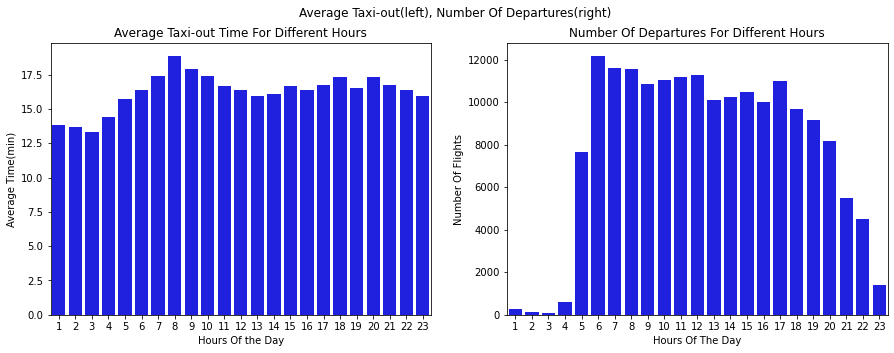

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Average Taxi-out(left), Number Of Departures(right)')

#average departures
sns.barplot(ax=axes[0], x=taxi_out_mean_hour.index, y=taxi_out_mean_hour.values,color='b')
axes[0].set_title('Average Taxi-out Time For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Average Time(min)')
#number of flights
sns.barplot(ax=axes[1], x=number_of_departures.index, y=number_of_departures.values,color='b')
axes[1].set_title('Number Of Departures For Different Hours')
axes[1].set_xlabel('Hours Of The Day')
axes[1].set_ylabel('Number Of Flights')

plt.show()

In [28]:
#Applying the function for arrival times and changing the format to date and time
flights_no_outlier['arrival_time_format'] = flights_no_outlier['arr_time'].apply(time_row)

flights_no_outlier['arrival_time_format'] = pd.to_datetime(\
                                            flights_no_outlier['arrival_time_format'],\
                                            format='%H:%M').dt.time

taxi_in_mean_hour = flights_no_outlier.groupby(by=[flights_no_outlier\
                                                   .arrival_time_format.map(\
                                                    lambda x : (x.hour))])['taxi_in'].mean()
number_of_arrivals = flights_no_outlier.groupby(by=[flights_no_outlier.arrival_time_format.map(lambda x : (x.hour))])['taxi_in'].count()

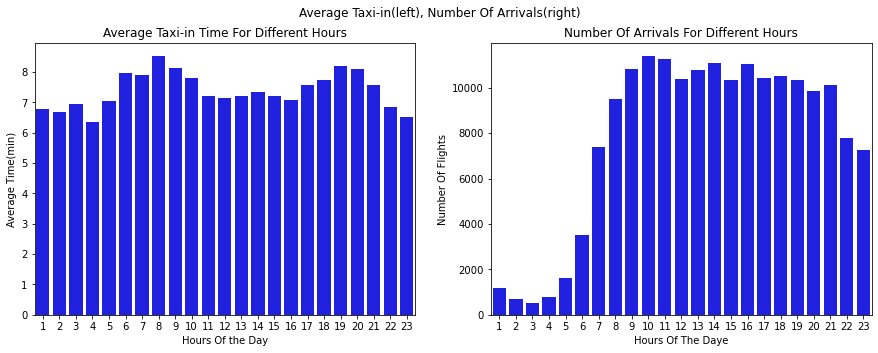

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Average Taxi-in(left), Number Of Arrivals(right)')

#average departures
sns.barplot(ax=axes[0], x=taxi_in_mean_hour.index, y=taxi_in_mean_hour.values,color='b')
axes[0].set_title('Average Taxi-in Time For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Average Time(min)')
#number of flights
sns.barplot(ax=axes[1], x=number_of_arrivals.index, y=number_of_arrivals.values,color='b')
axes[1].set_title('Number Of Arrivals For Different Hours')
axes[1].set_xlabel('Hours Of The Daye')
axes[1].set_ylabel('Number Of Flights')

plt.show()

In [774]:
#exporting the data frame which contains time
flights_no_outlier.to_csv('data/flights_no_outlier_iqr_time.csv')